### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(- x / 2)

In [76]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [5]:
%matplotlib inline

Визуализируем функцию.

In [77]:
def func(x):
    return math.sin(x/5.0) * math.exp(x/10.0) + 5 * math.exp(-x / 2.0)

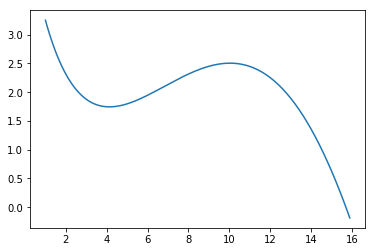

In [117]:
x = np.arange(1, 16, 0.1)
y = map(func, x)
plt.plot(x, y)
plt.show()

Сформируем левую часть системы линейных уравнений для многочлена n-ой степени.

In [130]:
def linear_matrix_a(dots):
    matrix = []
    for member in dots:
        equation = []
        for cur_power in range(len(dots)):
            equation.append(member ** cur_power)
        matrix.append(equation)
    return np.array(matrix)    
            
print linear_matrix_a([1, 15])    

[[ 1  1]
 [ 1 15]]


Сформируем правую часть системы линейных уравнений.

In [131]:
def linear_matrix_b(dots):
    return map(func, dots)

print linear_matrix_b([1, 15])

[3.252216865271419, 0.6352214195786656]


Решили систему уравнений с помощью np.linalg.solve(), получили коэффициенты для многочлена первой степени.

In [133]:
a = linear_matrix_a([1, 15])
b = linear_matrix_b([1, 15])
x_result = np.linalg.solve(a, b)
print x_result

[ 3.43914511 -0.18692825]


Сделаем функцию, чтобы визуализировать результат.

In [134]:
def made(dots, power):
    function = ''
    for member in range(power + 1):
        number = str(round(dots[member], 3))
        if member == 0:
            function = function + number
        elif member > 0 and dots[member] > 0:
            function = function + number + 'x^' + str(member)
        elif member != 0 and dots[member] < 0:
            function = function + number + 'x^' + str(member)
    return function

print made(x_result, 1)

3.439-0.187x^1


In [136]:
def made_func(dots, x_dots):
    func_dots = []
    for x_one in x_dots:
        cur_member = 0
        for power in range(len(dots)):
            cur_member = cur_member + dots[power] * (x_one ** power)
        func_dots.append(cur_member)
    return func_dots
    

print made_func(x_result, x)

[3.2522168652714187, 3.233524040659328, 3.2148312160472368, 3.1961383914351456, 3.1774455668230543, 3.1587527422109636, 3.1400599175988724, 3.121367092986781, 3.10267426837469, 3.0839814437625988, 3.065288619150508, 3.046595794538417, 3.0279029699263256, 3.0092101453142344, 2.9905173207021436, 2.9718244960900524, 2.953131671477961, 2.93443884686587, 2.9157460222537788, 2.8970531976416876, 2.878360373029597, 2.8596675484175056, 2.8409747238054144, 2.8222818991933236, 2.8035890745812324, 2.784896249969141, 2.76620342535705, 2.747510600744959, 2.7288177761328676, 2.710124951520777, 2.6914321269086856, 2.6727393022965944, 2.654046477684503, 2.6353536530724124, 2.616660828460321, 2.59796800384823, 2.579275179236139, 2.5605823546240476, 2.5418895300119564, 2.523196705399865, 2.5045038807877744, 2.4858110561756837, 2.4671182315635924, 2.4484254069515012, 2.42973258233941, 2.411039757727319, 2.3923469331152276, 2.3736541085031364, 2.354961283891045, 2.3362684592789544, 2.3175756346668632, 2.29

### Многочлен первой степени

Нарисовали функцию и полученный многочлен, многочлен первой степени не очень хорошо приближает функцию.

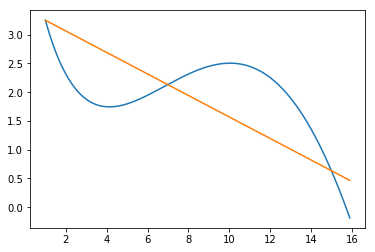

In [137]:
x = np.arange(1, 16, 0.1)
y_1 = made_func(x_result, x)
y = map(func, x)
plt.plot(x, y)
plt.plot(x, y_1)
plt.show()

### Многочлен второй степени

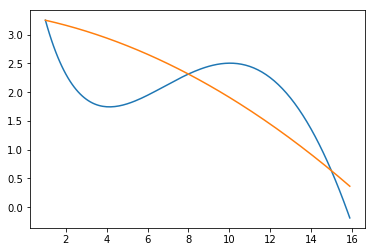

In [140]:
a = linear_matrix_a([1, 8, 15])
b = linear_matrix_b([1, 8, 15])
x_result_two = np.linalg.solve(a, b)
y_1 = made_func(x_result_two, x)
y = map(func, x)
plt.plot(x, y)
plt.plot(x, y_1)
plt.show()

### Многочлен третьей степени

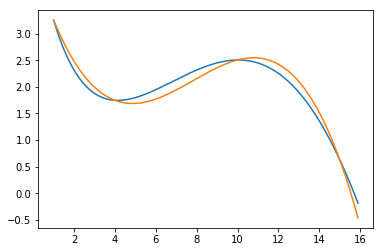

In [142]:
a = linear_matrix_a([1, 4, 10, 15])
b = linear_matrix_b([1, 4, 10, 15])
x_result_three = np.linalg.solve(a, b)
y_1 = made_func(x_result_three, x)
y = map(func, x)
plt.plot(x, y)
plt.plot(x, y_1)
plt.show()

In [144]:
print x_result_three

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [150]:
with open('answer2.txt', 'w') as final_file:
    for ans in x_result_three:
        final_file.write(str(round(ans, 2)) + ' ')